# PREDICTION SUR LA BASE TEST

In [3]:
import csv
import pandas as pd
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
 
# visualization
from plotnine import *
import missingno as msno
from mizani.formatters import percent_format ## format sur plotnine
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline
sns.set()
 
import warnings
warnings.filterwarnings('ignore')

#Le relancer pour ramener les bibliothèques

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn import cluster, datasets
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb #To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from collections import Counter

In [135]:
datatrain = pd.read_csv("train_projet.csv",sep=",", decimal=",")  #On prend la base de donnée
datatrain.shape

(276759, 25)

In [120]:
datatrain.head()  #On affiche la base de donnée

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE,TARGET
0,271629,Cash loans,Working,F,Married,Sales staff,Secondary / secondary special,House / apartment,NaN,0.580298196195024,...,1.1584,-19991,-243,860112.0,26208.0,157500.0,742500.0,-779.0,NaN,0
1,391694,Revolving loans,Commercial associate,F,Civil marriage,High skill tech staff,Secondary / secondary special,House / apartment,0.4537128257136905,0.5952437820546931,...,1.0,-11783,-124,585000.0,29250.0,202500.0,585000.0,-1740.0,NaN,0
2,162447,Cash loans,Working,F,Married,Sales staff,Secondary / secondary special,House / apartment,NaN,0.3221602052284073,...,1.198,-21475,-137,808650.0,23773.5,135000.0,675000.0,0.0,NaN,0
3,369192,Cash loans,Working,F,Civil marriage,Sales staff,Higher education,House / apartment,0.6677101454408042,0.6380279908906301,...,1.2112,-11508,-2172,545040.0,36553.5,180000.0,450000.0,-381.0,NaN,0
4,173948,Cash loans,Commercial associate,F,Married,Security staff,Secondary / secondary special,House / apartment,NaN,0.6285878501423835,...,1.396,-18196,-7035,942300.0,30528.0,112500.0,675000.0,-2146.0,NaN,0


In [121]:
datatrain.info()    #Perte de données sur 8) 9) 10) 12) 13) 15) 21) 23)   +   On apprend le format des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276759 entries, 0 to 276758
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   SK_ID_CURR              276759 non-null  int64 
 1   NAME_CONTRACT_TYPE      276759 non-null  object
 2   NAME_INCOME_TYPE        276759 non-null  object
 3   CODE_GENDER             276759 non-null  object
 4   NAME_FAMILY_STATUS      276759 non-null  object
 5   OCCUPATION_TYPE         190016 non-null  object
 6   NAME_EDUCATION_TYPE     276759 non-null  object
 7   NAME_HOUSING_TYPE       276759 non-null  object
 8   EXT_SOURCE_1            120653 non-null  object
 9   EXT_SOURCE_2            276172 non-null  object
 10  EXT_SOURCE_3            221783 non-null  object
 11  FLAG_OWN_CAR            276759 non-null  object
 12  ANNUITY_CREDIT_RATIO    276749 non-null  object
 13  ANNUITY_INCOME_RATIO    276749 non-null  object
 14  EMPLOYED_BIRTH_RATIO    276759 non-n

In [122]:
datatrain.shape    #Pour savoir taille du tableau

(276759, 25)

In [123]:
datatrain.describe()   #Prend que des variables quantitatives 

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,TARGET
count,276759.000000,276759.000000,276759.000000,276759.000000
mean,278114.107953,-16036.477766,63787.364985,0.080727
std,102779.741694,4364.076116,141253.448687,0.272416
min,100002.000000,-25229.000000,-17912.000000,0.000000
25%,189103.500000,-19679.000000,-2762.000000,0.000000
50%,278076.000000,-15751.000000,-1214.000000,0.000000
75%,367089.000000,-12414.000000,-290.000000,0.000000
max,456255.000000,-7489.000000,365243.000000,1.000000


# Imputation des valeurs manquantes

In [124]:
#Affichage des Nan en %

missing_values = pd.DataFrame((datatrain.isna().mean()*100).sort_values())
missing_values.columns = ['Valeurs manquantes en %']
missing_values

,Valeurs manquantes en %
SK_ID_CURR,0.000000
DAYS_LAST_PHONE_CHANGE,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
DAYS_EMPLOYED,0.000000
DAYS_BIRTH,0.000000
EMPLOYED_BIRTH_RATIO,0.000000
FLAG_OWN_CAR,0.000000
TARGET,0.000000
NAME_HOUSING_TYPE,0.000000


<AxesSubplot:>

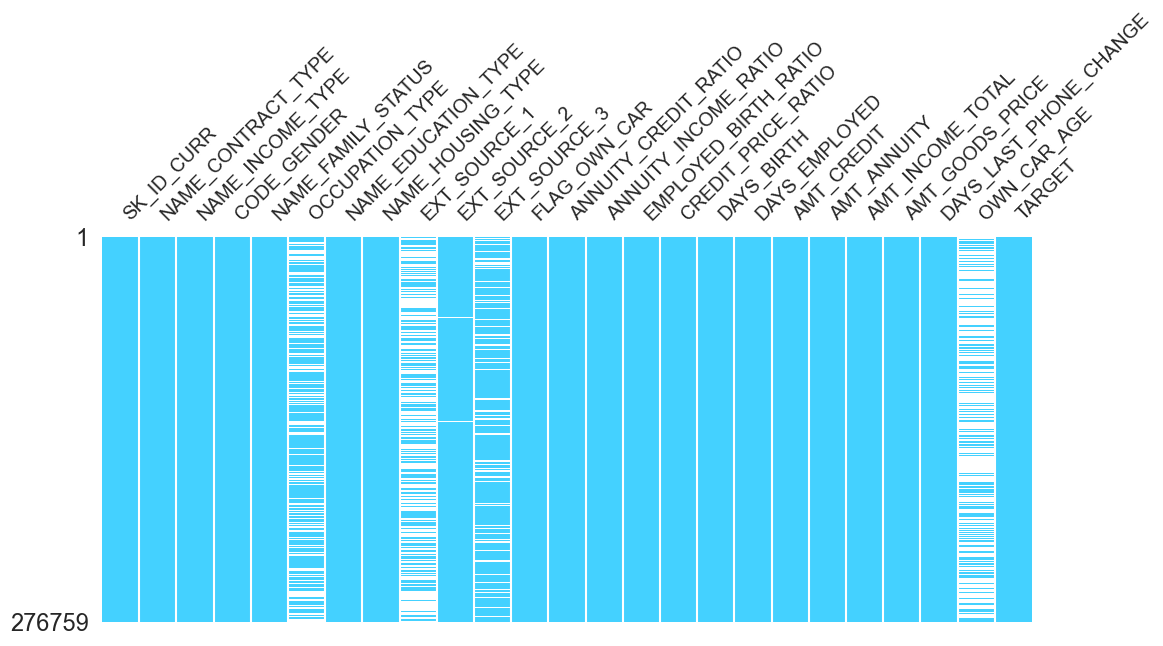

In [125]:
# NaN visualisation

import missingno as msno
msno.matrix(datatrain, sparkline=False, figsize=(12,5), fontsize=14, color=(0.27, 0.82, 1.0))

In [126]:
#Suppressions des variables inutiles càd les variables avec des grosses quantités de NA (La variable est alors non informative)

datatrain = datatrain.drop(["OWN_CAR_AGE"],axis=1)               #66% de NA
datatrain = datatrain.drop(["EXT_SOURCE_1"],axis=1)              #56% de NA
datatrain = datatrain.drop(["OCCUPATION_TYPE"],axis=1)           #31% de NA
datatrain = datatrain.drop(["EXT_SOURCE_3"],axis=1)              #19% de NA

In [127]:
datatrain.columns     #Vérifions si les colonne ont bien été supprimé

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'EXT_SOURCE_2', 'FLAG_OWN_CAR', 'ANNUITY_CREDIT_RATIO',
       'ANNUITY_INCOME_RATIO', 'EMPLOYED_BIRTH_RATIO', 'CREDIT_PRICE_RATIO',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE',
       'TARGET'],
      dtype='object')

In [128]:
#Numérisation des variables catégorielles par la fonction LabelEncoding

le = preprocessing.LabelEncoder()

for i in range(0,datatrain.shape[1]):
    if datatrain.dtypes[i]=='object':
        datatrain[datatrain.columns[i]] = le.fit_transform(datatrain[datatrain.columns[i]])

datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276759 entries, 0 to 276758
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   SK_ID_CURR              276759 non-null  int64
 1   NAME_CONTRACT_TYPE      276759 non-null  int32
 2   NAME_INCOME_TYPE        276759 non-null  int32
 3   CODE_GENDER             276759 non-null  int32
 4   NAME_FAMILY_STATUS      276759 non-null  int32
 5   NAME_EDUCATION_TYPE     276759 non-null  int32
 6   NAME_HOUSING_TYPE       276759 non-null  int32
 7   EXT_SOURCE_2            276759 non-null  int32
 8   FLAG_OWN_CAR            276759 non-null  int32
 9   ANNUITY_CREDIT_RATIO    276759 non-null  int32
 10  ANNUITY_INCOME_RATIO    276759 non-null  int32
 11  EMPLOYED_BIRTH_RATIO    276759 non-null  int32
 12  CREDIT_PRICE_RATIO      276759 non-null  int32
 13  DAYS_BIRTH              276759 non-null  int64
 14  DAYS_EMPLOYED           276759 non-null  int64
 15  

In [97]:
#On peut changer de variable en fonction de nos besoins de visualisation

var='NAME_FAMILY_STATUS'
c = datatrain[var].value_counts()
p = datatrain[var].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([c,p], axis=1, keys = ['Effectif', 'Frequence'])

,Effectif,Frequence
1,176841,63.9%
3,40837,14.8%
0,26788,9.7%
2,17783,6.4%
5,14508,5.2%
4,2,0.0%


# Data Visualisation

Nous allons visualiser les données avec plusieurs angles d'analyses : 
- Répartition des variables 
- Répartition des variables vis-à-vis du cout
- etc

Avant, faisons une vue globale des données

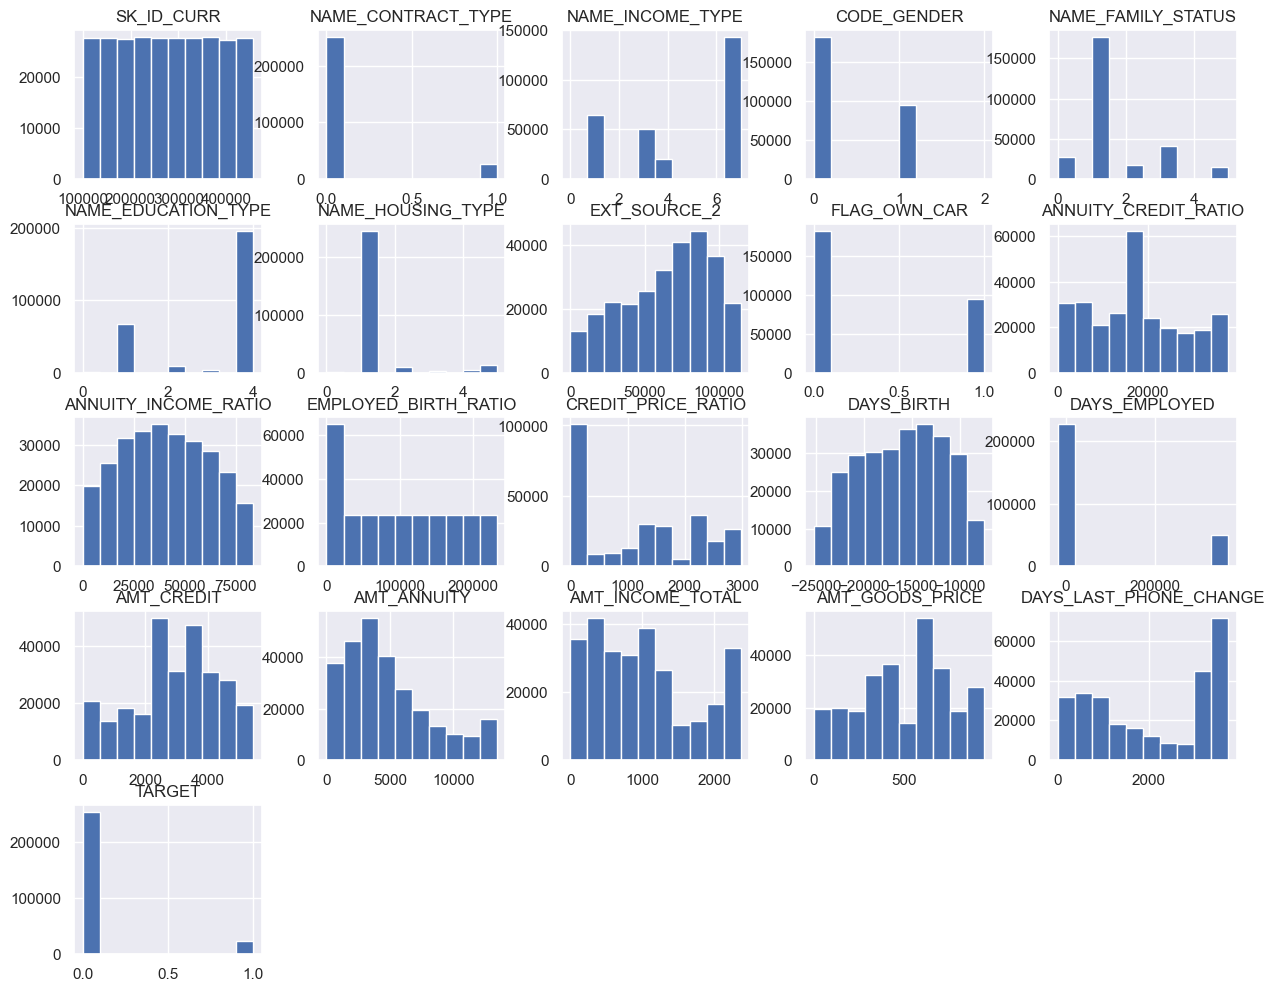

In [129]:
#First view

datatrain.hist(figsize=(15,12))
plt.show()

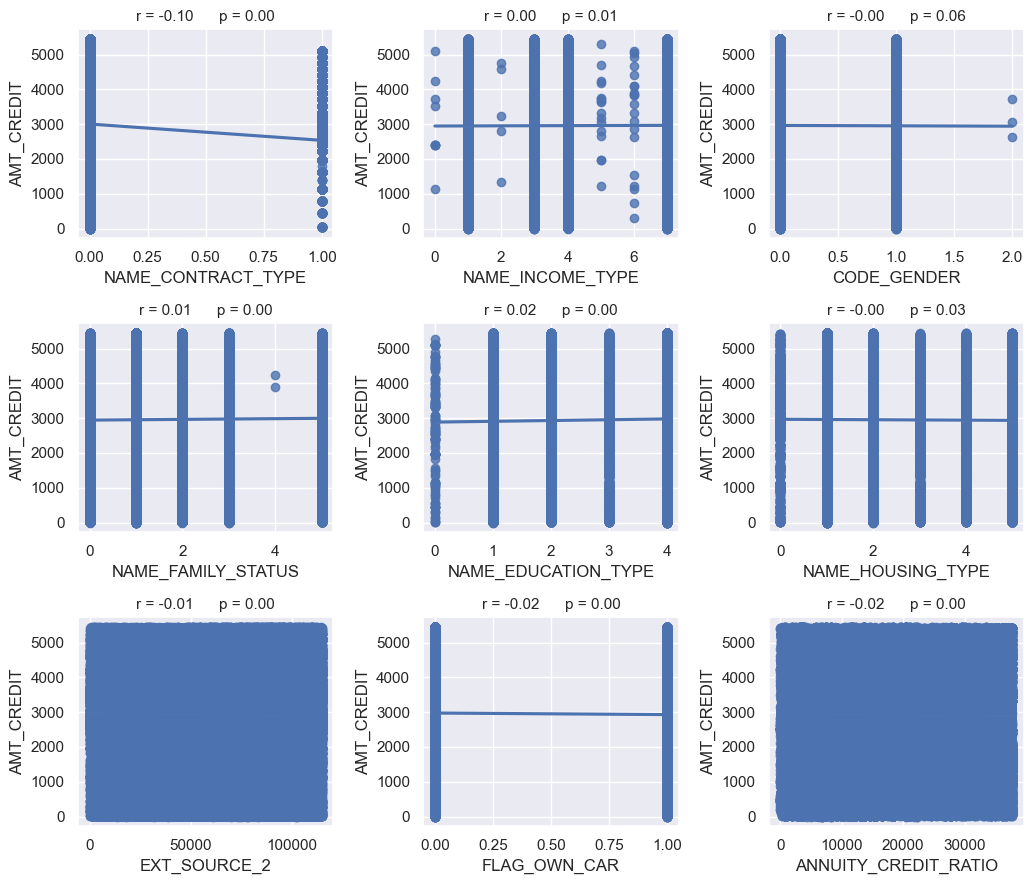

In [98]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

# First view on feature distribution
nr_rows = 3
nr_cols = 3
 
numerical_feats = datatrain.dtypes[datatrain.dtypes != "object"].index
target='AMT_CREDIT'                                                                        #A changer
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
 
li_num_feats = list(numerical_feats)
li_not_plot = ['SK_ID_CURR']                                                       #A changer peut être?
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

 
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(datatrain[li_plot_num_feats[i]], datatrain[target], ax = axs[r][c])
            stp = stats.pearsonr(datatrain[li_plot_num_feats[i]], datatrain[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
           
plt.tight_layout()    
plt.style.use('ggplot')
plt.show()

In [99]:
#On modèlise comme une loi Gamma

def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])
    
    plt.axvline(x = df[feature].mean(), c = 'blue')
    plt.axvline(x = df[feature].median(), c = 'green')

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(y=df.loc[:, feature], orient='h', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=14))

    plt.suptitle(f'{title}', fontsize=24)


Skewness: -0.331223
Kurtosis: -0.655274


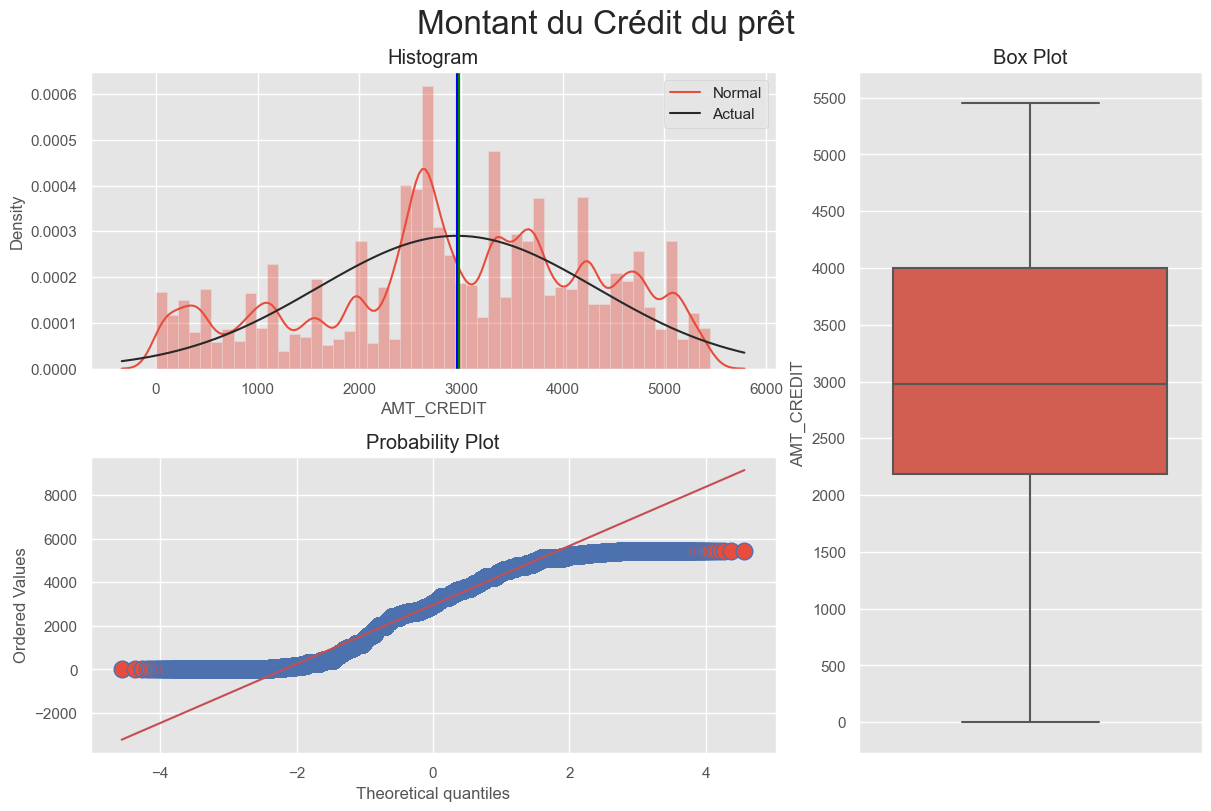

In [100]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

plot_dist3(datatrain, 'AMT_CREDIT', 'Montant du Crédit du prêt')

#skewness and kurtosis
print("Skewness: %f" % datatrain['AMT_CREDIT'].skew())
print("Kurtosis: %f" % datatrain['AMT_CREDIT'].kurt())

<AxesSubplot:>

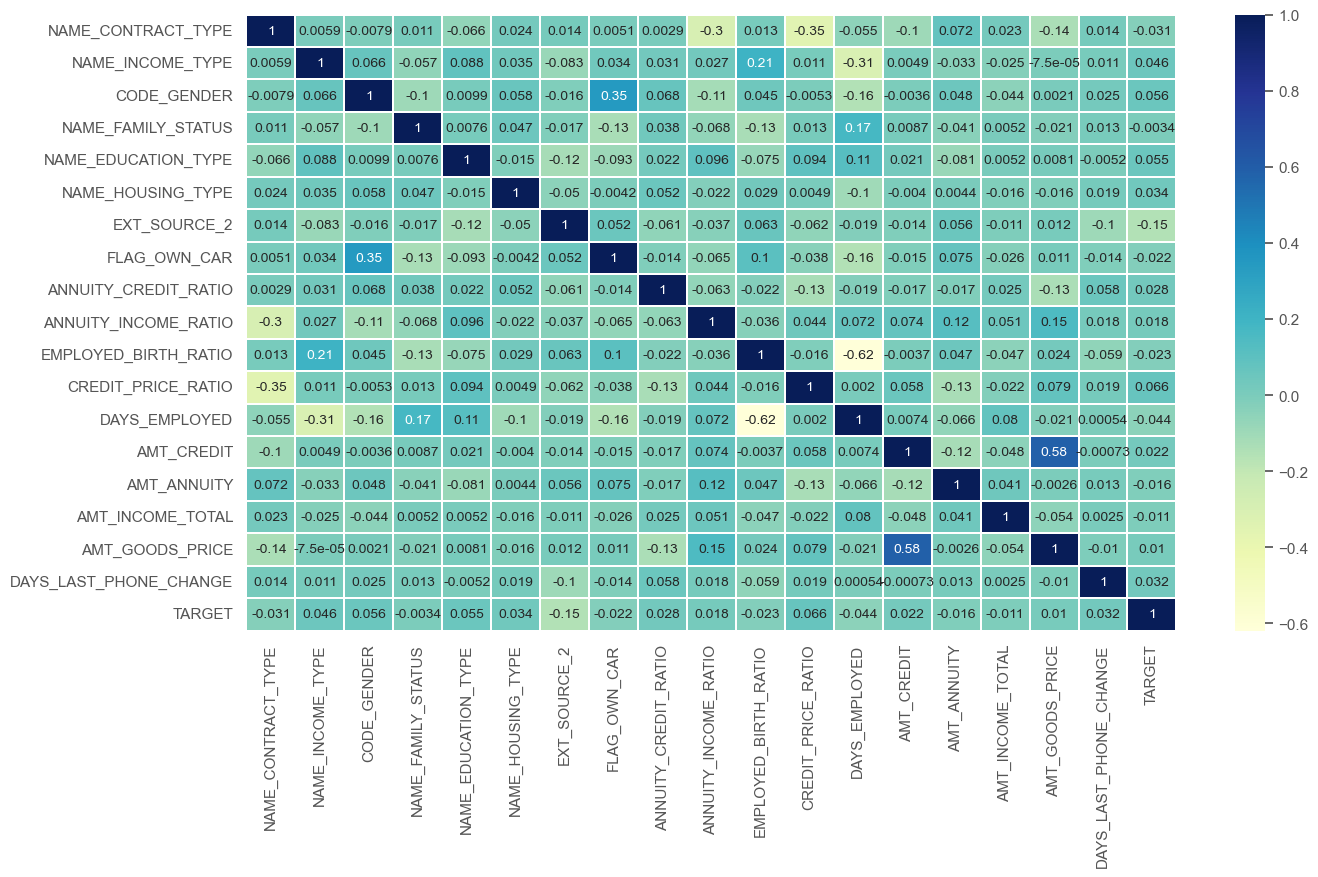

In [114]:
#Toutes les var quantitives de la datatrain
#format = datatrain.corr()
# Ecarter 'SK_ID_CURR', 'DAYS_BIRTH' de la matrice de corr

# ~ : permet de prendre le complémentaire 

corrmat = datatrain.loc[:, ~datatrain.columns.isin(['SK_ID_CURR', 'DAYS_BIRTH'])].corr()
f, ax = plt.subplots(figsize=(15,8))

sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths = 0.1, annot=True)

In [4]:
datatrain = pd.read_csv("train_projet.csv",sep=",", decimal=",")  #On reprend la base de donnée

In [5]:
#Suppressions des variables inutiles càd les variables avec des grosses quantités de NA (La variable est alors non informative)

datatrain = datatrain.drop(["OWN_CAR_AGE"],axis=1)               #66% de NA
datatrain = datatrain.drop(["EXT_SOURCE_1"],axis=1)              #56% de NA
datatrain = datatrain.drop(["OCCUPATION_TYPE"],axis=1)           #31% de NA
datatrain = datatrain.drop(["EXT_SOURCE_3"],axis=1)              #19% de NA

In [6]:
datatrain = datatrain[datatrain["CODE_GENDER"]!='XNA']   #On enlève les lignes avec CODE_GENDER = XNA

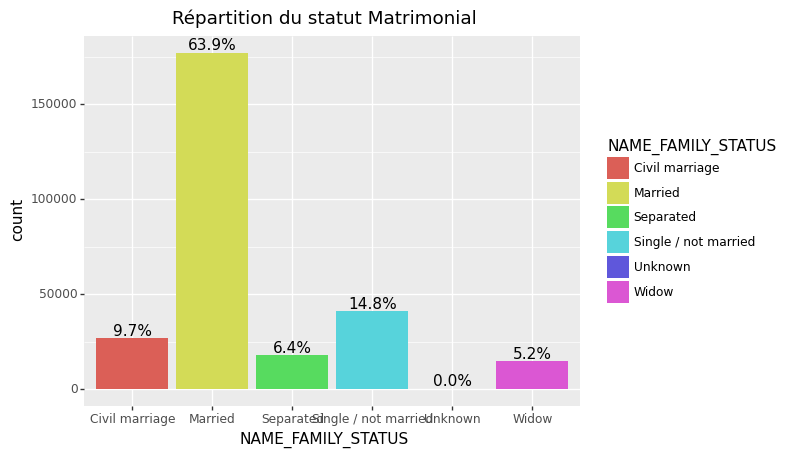

<ggplot: (144016188757)>

In [152]:
(ggplot(datatrain, aes(x = 'NAME_FAMILY_STATUS',fill='NAME_FAMILY_STATUS'))
 + geom_bar()
  + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 + ggtitle("Répartition du statut Matrimonial")
)

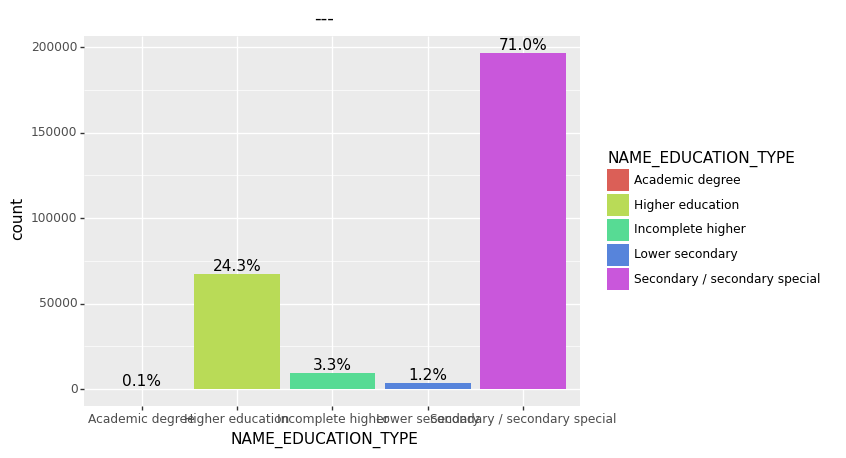

<ggplot: (144080141050)>

In [137]:
(ggplot(datatrain, aes(x = 'NAME_EDUCATION_TYPE',fill='NAME_EDUCATION_TYPE'))
 + geom_bar()
  + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 + ggtitle("Répartition du niveau d'étude")
)

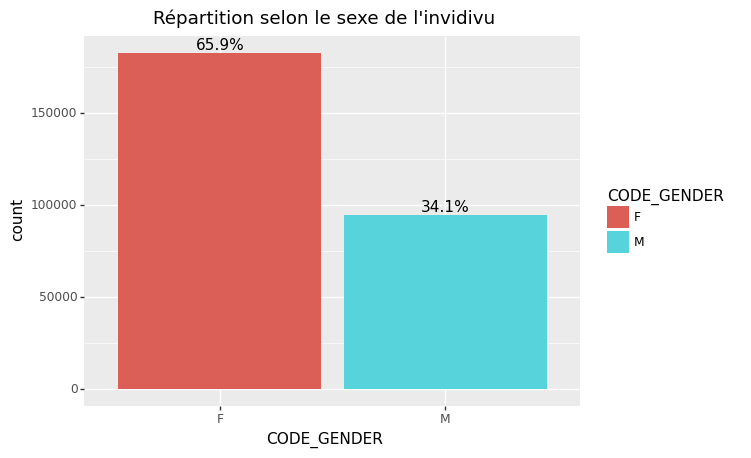

<ggplot: (144098606954)>

In [153]:
(ggplot(datatrain, aes(x = 'CODE_GENDER',fill='CODE_GENDER'))
 + geom_bar()
  + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 + ggtitle("Répartition selon le sexe de l'invidivu")
)

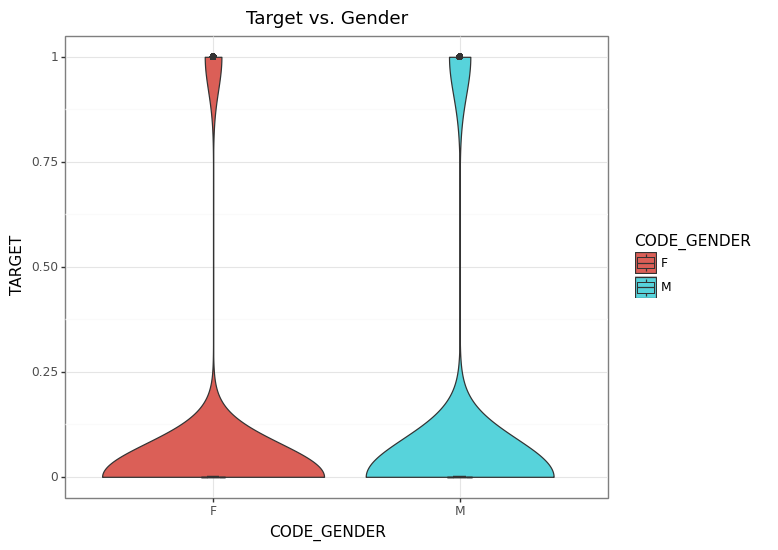

<ggplot: (144076160696)>

In [154]:
(ggplot(datatrain, aes(x = 'CODE_GENDER', y='TARGET', fill = 'CODE_GENDER'))   +
  geom_violin(trim=False) +
  geom_boxplot(notch=True, width=0.1) +
  ggtitle("Target vs. Gender")+
  theme_bw()+
  theme(figure_size=(7,6))
)

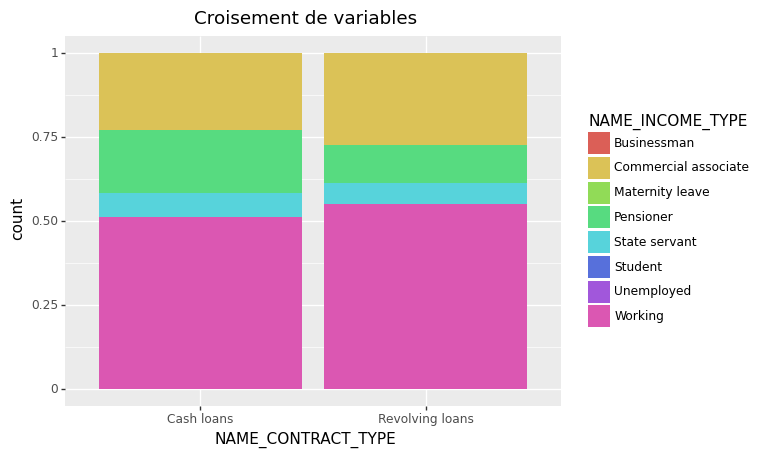

<ggplot: (144076557081)>

In [142]:
(ggplot(datatrain, aes(x="NAME_CONTRACT_TYPE", fill="NAME_INCOME_TYPE"))
 + ggtitle("Croisement de variables")
 + geom_bar(position="fill")
)

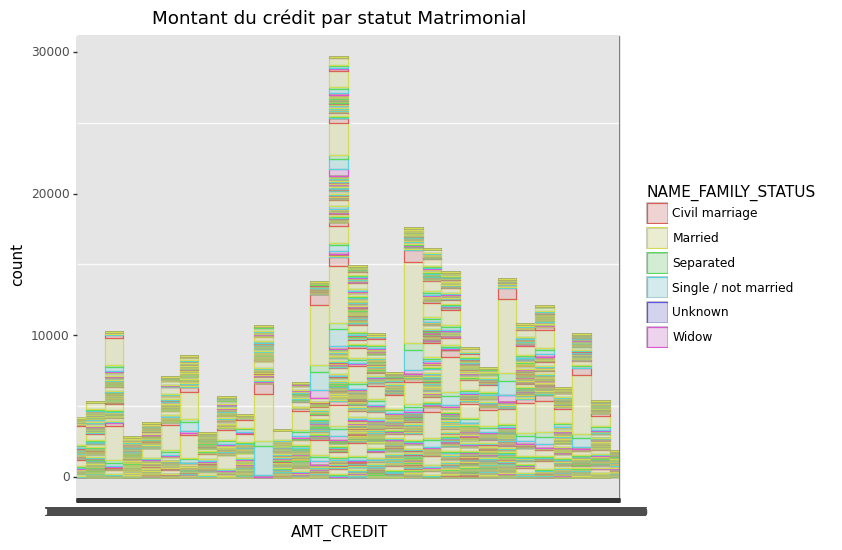

<ggplot: (144076075514)>

In [155]:
(ggplot(datatrain, aes(x = 'AMT_CREDIT',fill='NAME_FAMILY_STATUS', colour = 'NAME_FAMILY_STATUS'))+
    geom_histogram(alpha=0.2, bins=30)+
 ggtitle("Montant du crédit par statut Matrimonial")+
 theme_bw()+
 theme(figure_size=(7,6))
)

# Classification

In [180]:
datatrain.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE,TARGET
0,271629,0,7,0,1,14,4,1,104692,73077,...,1746,-19991,-243,4942,3812,646,790,3508,60,0
1,391694,1,1,0,0,6,4,1,44907,75803,...,64,-11783,-124,3907,4493,980,686,824,60,0
2,162447,0,7,0,1,14,4,1,104692,33098,...,2099,-21475,-137,4756,3270,419,752,3753,60,0
3,369192,0,7,0,0,14,1,1,76626,83843,...,2179,-11508,-2172,3736,6134,829,576,3004,60,0
4,173948,0,1,0,1,16,4,1,104692,82033,...,2857,-18196,-7035,5234,4778,159,752,1275,60,0


<AxesSubplot:xlabel='TARGET', ylabel='count'>

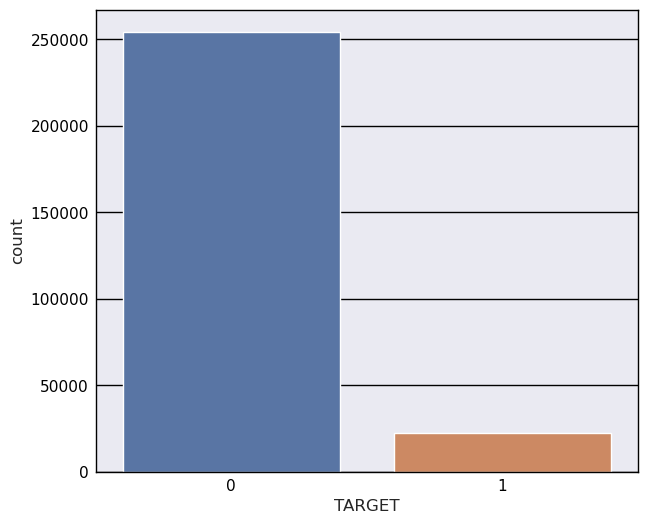

In [61]:
sns.countplot(datatrain['TARGET'], label="Count")
#sns.plt.show()

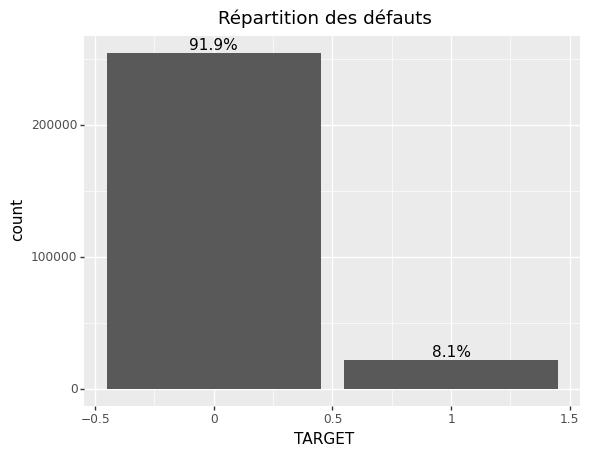

<ggplot: (160575393452)>

In [59]:
(ggplot(datatrain, aes(x ='TARGET', fill='TARGET'))
+ geom_bar()
+ geom_text(
    aes(label='stat(prop)*100',group=1),
    stat='count',
    nudge_y=0.125,
    va='bottom',
    format_string='{:.1f}%'
    )
+ ggtitle("Répartition des défauts")
)

#faire avec d'autres variables

# MODELISATION

In [185]:
#Numérisation des variables catégorielles par la fonction de LabelEncoding - Base totale
le = preprocessing.LabelEncoder()

for i in range(0,datatrain.shape[1]):
    if datatrain.dtypes[i]=='object':
        datatrain[datatrain.columns[i]] = le.fit_transform(datatrain[datatrain.columns[i]])
        
datatrain.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE,TARGET
0,271629,0,7,0,1,14,4,1,104692,73077,...,1746,-19991,-243,4942,3812,646,790,3508,60,0
1,391694,1,1,0,0,6,4,1,44907,75803,...,64,-11783,-124,3907,4493,980,686,824,60,0
2,162447,0,7,0,1,14,4,1,104692,33098,...,2099,-21475,-137,4756,3270,419,752,3753,60,0
3,369192,0,7,0,0,14,1,1,76626,83843,...,2179,-11508,-2172,3736,6134,829,576,3004,60,0
4,173948,0,1,0,1,16,4,1,104692,82033,...,2857,-18196,-7035,5234,4778,159,752,1275,60,0


In [188]:
datatrain_iloc = datatrain.iloc[:,[*range(1,3),*range(4,8),9,*range(11,18)]]   #sélectionner une cellule particulière de l'ensemble de données
datatrain_iloc.head()

,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_2,FLAG_OWN_CAR,ANNUITY_CREDIT_RATIO,ANNUITY_INCOME_RATIO,EMPLOYED_BIRTH_RATIO,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED
0,0,7,1,14,4,1,73077,0,4348,41033,15822,1746,-19991,-243
1,1,1,0,6,4,1,75803,0,17639,33624,13802,64,-11783,-124
2,0,7,1,14,4,1,33098,0,3858,44095,9703,2099,-21475,-137
3,0,7,0,14,1,1,83843,0,26539,51718,163086,2179,-11508,-2172
4,0,1,1,16,4,1,82033,0,5819,66063,216390,2857,-18196,-7035


In [189]:
len(datatrain_iloc)    #Savoir la taille de datatrain_iloc

276756

In [ ]:
len(datatrain["TARGET"])   #Verification bien même longueur entre datarain_iloc et datatrain["TARGET"] afin de pouvoir la suite.

In [193]:
rf_clf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=10, verbose=0)    

#n_estimators seuelement à 10 car très long à faire

selector_clf = RFECV(estimator=rf_clf, step=1, cv=5,
                     scoring='roc_auc')
rfe_clf = selector_clf.fit(datatrain_iloc, datatrain["TARGET"])

print(f"Optimal number of features: {rfe_clf.n_features_}")

Optimal number of features: 7


In [194]:
rfe_clf.cv_results_

{'mean_test_score': array([0.53648708, 0.56441301, 0.57793881, 0.60416205, 0.61550018,
        0.61019811, 0.61798464, 0.61352395, 0.61432722, 0.61369269,
        0.6134496 , 0.6163144 , 0.61750848, 0.61765926]),
 'std_test_score': array([0.00307263, 0.00294943, 0.00322042, 0.00673513, 0.00268109,
        0.0021981 , 0.00505252, 0.005576  , 0.00330071, 0.00350802,
        0.00655874, 0.00474481, 0.00378021, 0.00421729]),
 'split0_test_score': array([0.53396756, 0.56616649, 0.57605631, 0.61379499, 0.61827776,
        0.60907213, 0.62334992, 0.62117666, 0.6149939 , 0.61858734,
        0.62262126, 0.62180887, 0.62352483, 0.62305302]),
 'split1_test_score': array([0.53372058, 0.5685091 , 0.57795716, 0.60601583, 0.61353557,
        0.60809234, 0.61363181, 0.61853061, 0.61755786, 0.61039996,
        0.61191036, 0.61785356, 0.61803939, 0.61676363]),
 'split2_test_score': array([0.53574269, 0.560907  , 0.57399336, 0.60363116, 0.61292604,
        0.60811766, 0.61041917, 0.61017673, 0.61218787, 

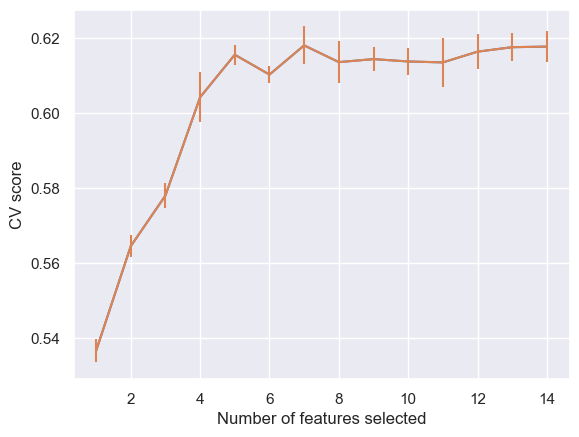

In [195]:
min_features_to_select = 1                             # Minimum number of features to consider
n_scores = len(rfe_clf.cv_results_["mean_test_score"])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("CV score")
plt.plot(range(1, len(rfe_clf.cv_results_["mean_test_score"]) + 1), rfe_clf.cv_results_["mean_test_score"])
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfe_clf.cv_results_["mean_test_score"],
    yerr=rfe_clf.cv_results_["std_test_score"],
)
plt.show()

rfe_sel= RFE(estimator=rf_clf,step=1, n_features_to_select=5)
rfe_sel_fit = rfe_sel.fit(datatrain.iloc[:,[*range(1,4),*range(5,13),-1]], datatrain["TARGET"])

#STORE indexes of selected variables
index=rfe_sel.get_support(indices=True)

In [196]:
datatrain_rfe = datatrain_iloc.iloc[:, rfe_clf.support_]
datatrain_rfe.head()

,EXT_SOURCE_2,ANNUITY_CREDIT_RATIO,ANNUITY_INCOME_RATIO,EMPLOYED_BIRTH_RATIO,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED
0,73077,4348,41033,15822,1746,-19991,-243
1,75803,17639,33624,13802,64,-11783,-124
2,33098,3858,44095,9703,2099,-21475,-137
3,83843,26539,51718,163086,2179,-11508,-2172
4,82033,5819,66063,216390,2857,-18196,-7035


In [197]:
datatrain_clean = shuffle(datatrain_rfe)                # On "secoue" les données (en lignes)

In [198]:
#On va séparer la base de données en deux pour créer une base d'apprentissage et une base de validation.

from sklearn.model_selection import train_test_split

target = datatrain["TARGET"]

X_train, X_test, Y_train, Y_test = train_test_split(datatrain_clean, target,
                                                   test_size=0.3, stratify=target,
                                                   random_state=0)
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(193729, 7) (193729,) (83027, 7) (83027,)


In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193729 entries, 154567 to 272766
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   EXT_SOURCE_2          193729 non-null  int32
 1   ANNUITY_CREDIT_RATIO  193729 non-null  int32
 2   ANNUITY_INCOME_RATIO  193729 non-null  int32
 3   EMPLOYED_BIRTH_RATIO  193729 non-null  int32
 4   CREDIT_PRICE_RATIO    193729 non-null  int32
 5   DAYS_BIRTH            193729 non-null  int64
 6   DAYS_EMPLOYED         193729 non-null  int64
dtypes: int32(5), int64(2)
memory usage: 8.1 MB


In [200]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy',
                               n_estimators = 100,
                               random_state = 1,
                               n_jobs = -1)

forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=1)

In [201]:
from sklearn.metrics import accuracy_score  #Il va chercher chaque élément bien placé
Y_pred_RF = forest.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(Y_test, Y_pred_RF))

#Normalement 0.92


Y_pred_RF_tr = forest.predict(X_train)

print("Accuracy: %.2f" % accuracy_score(Y_train, Y_pred_RF_tr))

#Normalement 1

Accuracy: 0.92
Accuracy: 1.00


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     76324
           1       0.00      0.00      0.00      6703

    accuracy                           0.92     83027
   macro avg       0.46      0.50      0.48     83027
weighted avg       0.85      0.92      0.88     83027



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

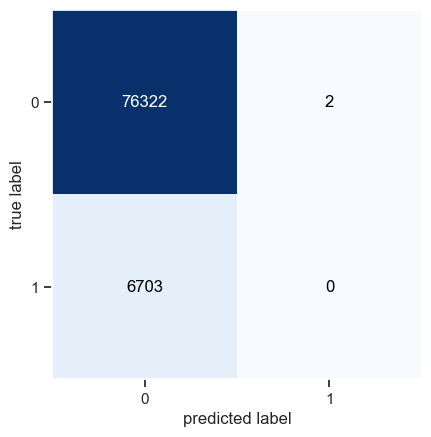

In [202]:
# Evaluate predictions

from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

pred_lgb = forest.predict(np.array(X_test))
conf_mat_lgb = confusion_matrix(Y_test, pred_lgb)
print(classification_report(Y_test, pred_lgb))
plot_confusion_matrix(conf_mat_lgb) #classe les individus en non résiliés 

#print('Confusion matrix: \n', conf_mat)

In [203]:
#the function that we will use to better evaluathe the model

def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision : {}".format(precision_score(true_value, pred)))
    print("recall : {}".format(recall_score(true_value, pred)))
    print("f2 : {}".format(fbeta_score(true_value, pred, beta=2)))

In [205]:
# Smote model

classifier = RandomForestClassifier

#build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                        classifier(criterion = 'entropy',
                                                  n_estimators=100,
                                                  #max_depth=5,
                                                  random_state=123))
smote_model = smote_pipeline.fit(X_train, Y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the difference before and after the transformation used

print("normal data distribution {}".format(Counter(target)))  #Nb obs classe 0 et classe 1 
X_smote, Y_smote = SMOTE().fit_resample(datatrain_rfe,target)
print("SMOTE data distribution {}".format(Counter(Y_smote)))  #Nb obs classe 0 et classe 1 

normal data distribution Counter({0: 254414, 1: 22342})
SMOTE data distribution Counter({0: 254414, 1: 254414})


In [ ]:
# evaluate predictions
# !pip install mlxtend

from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

smote_prediction = smote_model.predict(np.array(X_test))
conf_mat_lgb = confusion_matrix(Y_test, smote_prediction)
print(classification_report(Y_test, smote_prediction))
plot_confusion_matrix(conf_mat_lgb)


#print('Confusion matrix: \n', conf_mat)

# OPTIMISATION DES HYPERPARAMETRES

In [206]:
#params of the model
param_grid = {"max_depth": [3,5,8],
             "n_estimators":[5,10,20,50,100],
             "max_features": [5,6,7,8]}

#Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2, n_estimators=10,
                               random_state=3, criterion='entropy', n_jobs=-1, verbose=1)

#Elle utilise les IP paramètres un à un pour dire lequel est le meilleur

In [207]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=0)
grid_search.fit(X_smote, Y_smote)

#Très long normal

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished
[Parallel(n_jobs=

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent w

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n

[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elaps

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    5.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent w

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    4.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent work

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.5s finished
[Parallel(n_jobs=

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    7.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    8.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    8.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.5s finished
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    4.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=-1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, 8], 'max_features': [5, 6, 7, 8],
                         'n_estimators': [5, 10, 20, 50, 100]},
             scoring='roc_auc')

In [208]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8007914926477199
{'max_depth': 8, 'max_features': 5, 'n_estimators': 100}


In [209]:
#Running the fit

rf = RandomForestClassifier(max_depth=8, max_features = 6, n_estimators = 100)
rf.fit(X_smote, Y_smote)

RandomForestClassifier(max_depth=8, max_features=6)

              precision    recall  f1-score   support

           0       0.92      0.67      0.77     76324
           1       0.08      0.34      0.13      6703

    accuracy                           0.64     83027
   macro avg       0.50      0.51      0.45     83027
weighted avg       0.85      0.64      0.72     83027



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

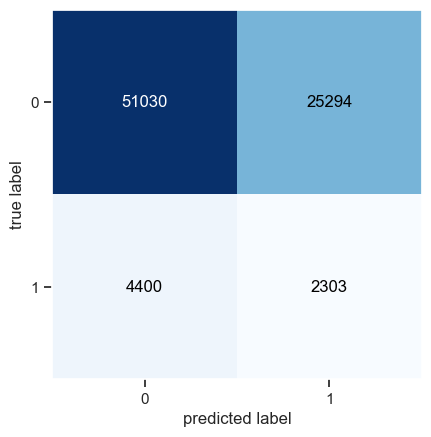

In [210]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

y_pred = rf.predict(np.array(X_test))
conf_mat_rf = confusion_matrix(Y_test, y_pred)

print(classification_report(Y_test, y_pred))
plot_confusion_matrix(conf_mat_rf)

<AxesSubplot:>

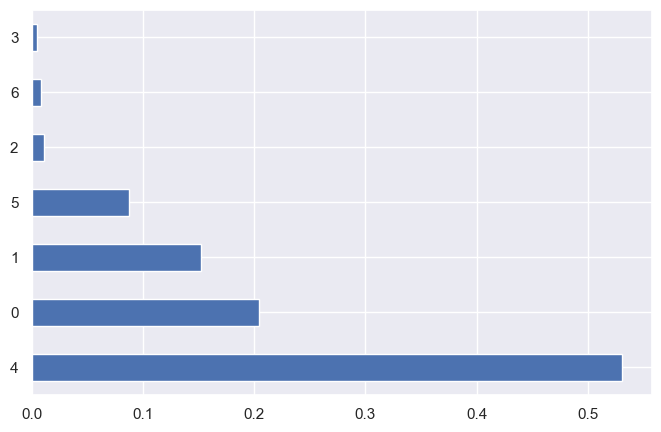

In [211]:
feat_imp = pd.Series(rf.feature_importances_)                             #Récupere importance des variables
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,5))

In [212]:
# Associate the variable label
featNames= X_train.columns.values
lgbmMetrics = pd.concat([pd.Series(featNames), pd.Series(rf.feature_importances_)],axis=1)
lgbmMetrics.columns = ['Variables', 'Importance']
lgbmMetrics.head()

,Variables,Importance
0,EXT_SOURCE_2,0.203999
1,ANNUITY_CREDIT_RATIO,0.152270
2,ANNUITY_INCOME_RATIO,0.011204
3,EMPLOYED_BIRTH_RATIO,0.005212
4,CREDIT_PRICE_RATIO,0.530959


In [213]:
#ordered by decreasing order

metrics_sorted = lgbmMetrics.sort_values(by='Importance', ascending=False)
metrics_sorted.head()

,Variables,Importance
4,CREDIT_PRICE_RATIO,0.530959
0,EXT_SOURCE_2,0.203999
1,ANNUITY_CREDIT_RATIO,0.152270
5,DAYS_BIRTH,0.087673
2,ANNUITY_INCOME_RATIO,0.011204


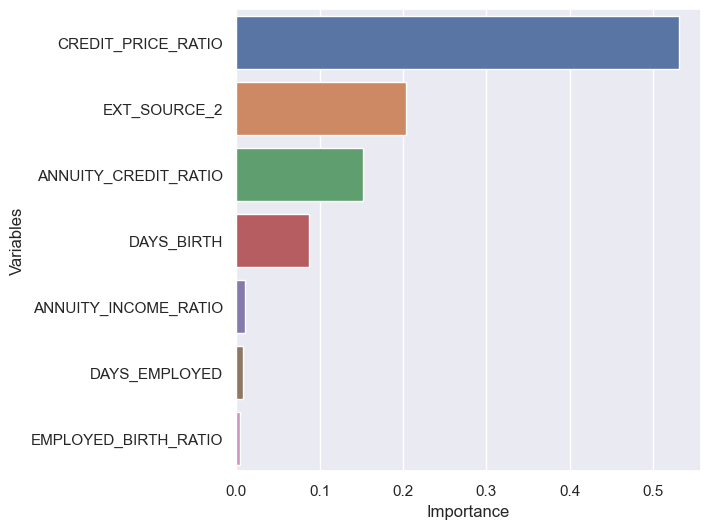

In [214]:
#Importance of the variales

g = sns.barplot(x="Importance", y="Variables", data=metrics_sorted[:12])
g.figure.set_size_inches(6,6)
sns.set(font_scale=0.8)
#plt.grid(b=True, which='both', colors='0.65', linestyle='--')
plt.show()

# PREDICTION SUR LA BASE TEST


In [221]:
datatest = pd.read_csv("test_projet.csv",sep=",", decimal=",")
datatest.shape

(30752, 24)

In [222]:
datatest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,EMPLOYED_BIRTH_RATIO,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE
0,194529,Cash loans,Working,M,Single / not married,Security staff,Secondary / secondary special,Municipal apartment,0.2198818830465193,0.1906200392657957,...,0.03019710651519565,1.396,-10299,-311,376920.0,20574.0,67500.0,270000.0,-542.0,NaN
1,311225,Revolving loans,Working,M,Married,Managers,Secondary / secondary special,House / apartment,0.2351440963312081,0.323661473537592,...,0.1996474217717056,1.0,-11345,-2265,540000.0,27000.0,270000.0,540000.0,-2069.0,NaN
2,136870,Cash loans,Working,F,Civil marriage,Medicine staff,Secondary / secondary special,House / apartment,0.2757055668420481,0.6861517206692015,...,0.4787856071964018,1.4224,-13340,-6387,640080.0,31261.5,81000.0,450000.0,-256.0,NaN
3,239933,Cash loans,State servant,M,Married,Managers,Higher education,House / apartment,0.456446293913502,0.5588307256833587,...,0.5152880815364349,1.1188,-14423,-7432,1762110.0,46611.0,202500.0,1575000.0,-1486.0,13.0
4,342189,Cash loans,Working,M,Single / not married,NaN,Secondary / secondary special,House / apartment,NaN,0.5254010619859133,...,0.03845395385525537,1.066,-10142,-390,239850.0,24336.0,135000.0,225000.0,-2326.0,6.0


In [223]:
#Numérisation des variables catégorielles par la fonction LabelEncoding -- Base test

le = preprocessing.LabelEncoder()

for i in range(0,datatest.shape[1]):
    if datatest.dtypes[i]=='object':
        datatest[datatest.columns[i]] = le.fit_transform(datatest[datatest.columns[i]])
    

In [224]:
datatest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,EMPLOYED_BIRTH_RATIO,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE
0,194529,0,6,1,3,16,4,2,1415,2348,...,6937,1274,-10299,-311,1476,1809,466,244,2762,52
1,311225,1,6,1,1,10,4,1,1630,4797,...,21643,16,-11345,-2265,1892,2909,267,336,1188,52
2,136870,0,6,0,0,11,4,1,2275,20966,...,27869,1294,-13340,-6387,2132,3599,504,305,1724,52
3,239933,0,3,1,1,10,1,1,5671,12826,...,28139,527,-14423,-7432,901,5466,205,142,541,5
4,342189,0,6,1,3,18,4,1,13244,11173,...,7922,152,-10142,-390,1141,2470,89,228,1471,46


In [225]:
datatest_select = datatest[datatrain_rfe.columns]

In [226]:
datatest_select.head()

,EXT_SOURCE_2,ANNUITY_CREDIT_RATIO,ANNUITY_INCOME_RATIO,EMPLOYED_BIRTH_RATIO,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED
0,2348,6477,16833,6937,1274,-10299,-311
1,4797,5325,3530,21643,16,-11345,-2265
2,20966,5182,18264,27869,1294,-13340,-6387
3,12826,137,13854,28139,527,-14423,-7432
4,11173,10210,10546,7922,152,-10142,-390


In [227]:
test_pred = rf.predict(datatest_select)

In [230]:
#C:\Users\Louis\OneDrive\Bureau\Utile\FAC MASTER1\Sciences des données\Projet ML AIMAF1
datatest['TARGET'] = test_pred
datatest[['SK_ID_CURR','TARGET']].to_csv('datatest_projet.csv',index=False)


In [235]:
datatest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,CREDIT_PRICE_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,OWN_CAR_AGE,TARGET
0,194529,0,6,1,3,16,4,2,1415,2348,...,1274,-10299,-311,1476,1809,466,244,2762,52,1
1,311225,1,6,1,1,10,4,1,1630,4797,...,16,-11345,-2265,1892,2909,267,336,1188,52,1
2,136870,0,6,0,0,11,4,1,2275,20966,...,1294,-13340,-6387,2132,3599,504,305,1724,52,1
3,239933,0,3,1,1,10,1,1,5671,12826,...,527,-14423,-7432,901,5466,205,142,541,5,1
4,342189,0,6,1,3,18,4,1,13244,11173,...,152,-10142,-390,1141,2470,89,228,1471,46,1
